In [1]:
%matplotlib inline

import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
cube = imageio.imread('data/cube.jpg')

In [3]:
camera = imageio.imread('imageio:camera.png')

Imageio: 'camera.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/camera.png (118 kB)
Downloading: 8192/120597 bytes (6.840960/120597 bytes (34.098304/120597 bytes (81.5114688/120597 bytes (95.1%120597/120597 bytes (100.0120597/120597 bytes (100.0%)
  Done
File saved as /home/pablo/.imageio/images/camera.png.


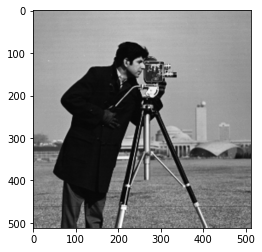

In [4]:
plt.imshow(camera, cmap='gray')

## Checker board Dither 

## Floyd-Steinberg Dithering

In [5]:

def clip_value(value):
    if value > 127:
        return 255, value-255
    else:
        return 0,value

def dither(img, alg):
    out = np.zeros(img.shape)

    for y,row in enumerate(img):
        for x,col in enumerate(row):
            h,w = img.shape

            value, error = clip_value(img[y,x]+out[y,x])

            out[y,x] = value


            alg(error, out, y,x)

    return out.astype(np.uint8)

def spread_error(error,coef, coords, out, y, x):
    h,w = out.shape
    
    
    for coord, k in coords:
        try:
            out[coord] = error * k * coef
        except IndexError:
            continue
    
    
def floyd_steinberg(error, out, y,x):

    # Spread error
    #       X     7/16
    # 3/16  5/16  1/16
    coef = 1/16
    
    
    coords = [
        ((y  , x+1),7),       
        ((y+1, x+1),3),
        ((y+1, x  ),5),
        ((y-1, x-1),1),
    ]
        
    spread_error(error, coef, coords, out, y, x)

def simple_floyd(error, out, y, x):
   
    # Spread error
    #       X     7/16
    # 3/16  5/16  1/16

    coef= 1/8
    coords = [
        ((y  ,x+1), 3),
        ((y+1,x  ), 3),
        ((y+1,x+1), 2),
    ]
    
    spread_error(error, coef, coords, out, y, x)
            
def jjn(error, out, y, x):
    
    coef= 1/48
    
    coords =[
        ((y  , x+1), 7),
        ((y  , x+2), 5),
        ((y+1, x-2), 3),
        ((y+1, x-1), 5),
        ((y+1, x  ), 7),
        ((y+1, x+1), 5),
        ((y+1, x+2), 3),
        ((y+2, x-2), 1),
        ((y+2, x-1), 3),
        ((y+2, x  ), 5),
        ((y+2, x+1), 3),
        ((y+2, x+2), 1),        
    ]
    
    spread_error(error, coef, coords, out, y, x)
    
    
def stucki(error, out, y, x):
    
    coef = 1/42
    
    coords =[
        ((y  , x+1), 8),
        ((y  , x+2), 4),
        ((y+1, x-2), 2),
        ((y+1, x-1), 4),
        ((y+1, x  ), 8),
        ((y+1, x+1), 4),
        ((y+1, x+2), 2),
        ((y+2, x-2), 1),
        ((y+2, x-1), 2),
        ((y+2, x  ), 4),
        ((y+2, x+1), 2),
        ((y+2, x+2), 1),        
    ]
    
    spread_error(error, coef, coords, out, y, x)

def atkinson(error, out, y,x):
    
    coef = 1/8
    
    coords =[
        ((y  , x+1), 1),
        ((y  , x+2), 1),
        ((y+1, x-1), 1),
        ((y+1, x  ), 1),
        ((y+1, x+1), 1),
        ((y+2, x  ), 1),
     
    ]
    
    spread_error(error, coef, coords, out, y, x)
    
def burkes(error, out, y, x):
    
    coef = 1/32
    
    coords =[
        ((y  , x+1), 8),
        ((y  , x+2), 4),
        ((y+1, x-2), 2),
        ((y+1, x-1), 4),
        ((y+1, x  ), 8),
        ((y+1, x+1), 4),
        ((y+1, x+2), 2),
     
    ]
    
    spread_error(error, coef, coords, out, y, x)

    
def sierra(error, out, y, x):
    coef = 1/32
    
    coords =[
        ((y  , x+1), 5),
        ((y  , x+2), 3),
        ((y+1, x-2), 2),
        ((y+1, x-1), 4),
        ((y+1, x  ), 5),
        ((y+1, x+1), 4),
        ((y+1, x+2), 2),
        ((y+2, x-1), 2),
        ((y+2, x  ), 3),
        ((y+2, x+1), 2),
    ]
    
    spread_error(error, coef, coords, out, y, x)
    
def save(in_img, method, out_name):
    out =dither(camera, method) 
    imageio.imwrite(out_name, out)

In [6]:
save(camera, floyd_steinberg, '001-floyd-steinberg.png')

In [7]:
save(camera, simple_floyd, '002-simple-floyd.png')

In [8]:
save(camera, jjn, '003-jjn.png')

In [9]:
save(camera, stucki, '004-stucki.png')

In [10]:
save(camera, atkinson, '005-atkinson.png')

In [11]:
save(camera, burkes, '006-burkes.png')

In [12]:
save(camera, sierra, '007-sierra.png')